<a href="https://colab.research.google.com/github/stefantatur/ML_projects/blob/main/ARIMA_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
from plotly.offline import init_notebook_mode

In [8]:
df=pd.read_csv('new_table_after_corr.csv', index_col='Unnamed: 0.1')
df = df.rename(columns={'Unnamed: 0': 'Год'})
df.head()

,Год,"Реальные денежные доходы населения, в процентах к предыдущему периоду 1)","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации*, %","Коэффициент материнской смертности (3.1.1), на 100 тысяч родившихся живыми",Смертность детей в возрасте 0 - 4 года на 1000 родившихся живыми 1) 2),Младенческая смертность (на 1 тыс. родившихся живыми) (промилле) 1),Заболеваемость туберкулезом на 100 000 человек (3.3.2)1),"Смертность от туберкулеза1)2) , на 100 000 населения",Заболеваемость малярией на 1000 человек (3.3.3)1),Заболеваемость гепатитом B на 100 000 человек (3.3.4) 1),...,Индекс физического объема валового регионального продукта на душу населения 1),"Грузооборот по видам транспорта, млрд. тонно-км","Пассажирооборот по видам транспорта общего пользования, млрд. пассажиро-км","Доля автомобильных дорог местного значения, соответствующих нормативным требованиям, %",Коэффициент Джини (индекс концентрации доходов) 1),"Доля оплаты труда наемных работников (заработная плата и фактические отчисления на социальное страхование) в валовом внутреннем продукте (10.4.1), %","Ассигновано средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Фактически освоено средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Площадь лесных земель, пройденная пожарами, га","Валовой региональный продукт на душу населения, рублей 1)"
0,2010,106.5,9.236597,21.5,9.6,7.6,70.6,26.1,0.000000,6.425235,...,106.6,4028.718800,4414064.4,50.2,0.397,43.0,963116.2,963116.2,1897.0,154127.9
1,2011,100.5,10.310649,15.1,9.8,7.6,65.4,23.8,0.000234,7.076025,...,107.1,4022.796200,4287625.6,53.4,0.392,44.6,988212.6,988212.6,2330.0,179470.3
2,2012,106.4,9.047841,16.0,10.8,9.1,59.6,20.8,0.001642,6.787817,...,102.7,4870.286800,4234356.2,53.0,0.398,46.7,846412.0,846412.0,108.0,198129.2
3,2013,108.1,9.430277,14.1,11.2,9.5,52.5,20.0,0.000470,6.846943,...,103.1,5859.029465,3666609.9,50.5,0.395,45.4,701144.3,701144.3,10.0,215923.2
4,2014,103.2,10.658345,7.8,9.8,7.9,46.5,17.5,0.000235,5.655301,...,103.3,6320.547800,3478790.2,52.7,0.396,41.6,1043274.1,1043274.1,324.0,237465.8


In [66]:
data_to_plot = pd.read_csv('/content/Копия my_data_cur3 - Лист1.csv')
data_to_plot.head()

,Регион,Год,Доля проходящих мед осмотр,Доля граждан занимающихся физкультурой,Ожидаемая продолжительность здоровой жизни,Ожидаемая продолжительность жизни при рождении,"Доля граждан, ведущих здоровый образ жизни","Обеспеченность врачами на 10 000 человек населения, человек",Обеспеченность врачами,Число медицинских работников на душу населения,...,Коэффициент смертности детей в возрасте до пяти лет,"Смертность населения в трудоспособном возрасте, на 100 тыс. населения","Коэффициент материнской смертности \nЧисло умерших женщин от осложнений беременности, родов и послеродового периода\n на 100 000 родившихся живыми, человек \n","Смертность детей в возрасте 0-4 года \nна 1 000 родившихся живыми, промилле","Младенческая смертность (на 1 000 родившихся живыми), промилле",Рождаемость среди подростков \nна 1 000 женщин (15-19 лет),"Доля расходов на здравоохранение от суммы всех потребительских расходов, в %","Доля расходов на медицинские услуги от суммы всех расходов на оплату услуг, в %",Количество погибших в ДТП,"Количество ДТП из-за опьянения, единиц\n"
0,РФ,2016,0,"34,2","63,5","71,9",0,"46,40","0,00464","104,8",...,"7,4","525,3","10,0","7,4","6,0","21,5","3,6","6,8","13,8",15 669
1,РФ,2017,"39,7","36,8",0,"72,7",0,"47,5","0,00475","103,8",...,"6,9","484,5","8,8","6,9","5,6","18,4","3,8","7,4","13,0",14 972
2,РФ,2018,"42,2","39,8",0,"72,9",0,"47,9","0,00479","101,6",...,"6,3","482,2","9,1","6,3","5,1","16,1","3,7","7,2","12,4",15 166
3,РФ,2019,"47,2",43,"60,3","73,3",12,"48,7","0,00487","101,6",...,"6,0","470,0","9,0","6,0","4,9","14,6","3,8","6,8","11,6",14 689
4,РФ,2020,"26,3","45,4","58,9","71,5","9,1","50,4","0,00504",102,...,"5,5","548,2","11,2","5,5","4,5","14,1","4,0","5,9","10,83",14 0013


In [9]:
reg_product = df[['Валовой региональный продукт на душу населения, рублей 1)', 'Год']]

In [10]:
reg_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Валовой региональный продукт на душу населения, рублей 1)  13 non-null     float64
 1   Год                                                        13 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 312.0 bytes


In [47]:
plt.style.use('dark_background')

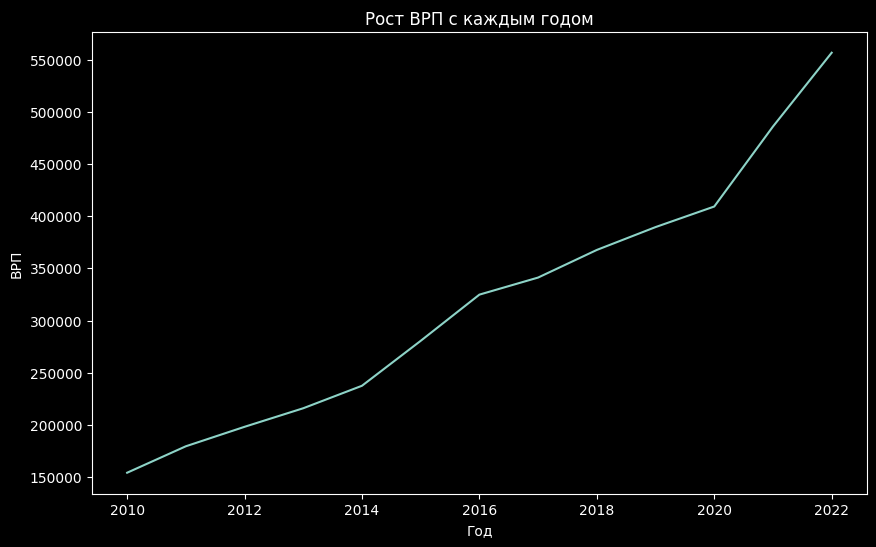

In [65]:
vrp = reg_product['Валовой региональный продукт на душу населения, рублей 1)']
year = reg_product['Год']

plt.figure(figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('ВРП')
plt.title('Рост ВРП с каждым годом')

plt.plot(year, vrp)

In [42]:
vrp_diff = vrp.diff().dropna() # первая производная
vrp_log = np.log(vrp) # логарифмирование для уменьшение дисперсии

**Тест Дики-Фуллера (ADF-тест)**

Проверяет наличие единичного корня (нестационарности)

Лагов очень мало, так как выборка маленького размера.

In [43]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(vrp, regression='ct', maxlag=3)
print(f'ADF p-value: {result[1]}')


ADF p-value: 0.7721734856781752


Такое значение p-value указывает на вероятную **нестационарность** ряда.

Ряд не стационарный,в том смысле,что дисперсия не является константным значением. Можно видеть что на разных промежутках дисперсия разная. Необходимо подогнать модель ARIMA под наш не стационарный ряд путем разности некоторого порядка.

In [44]:
msk = (vrp.index < len(reg_product)-7)
data_train = vrp[msk].copy()
data_test = vrp[~msk].copy()

ARIMA(p,d,q)
ARMA
x2 - x1

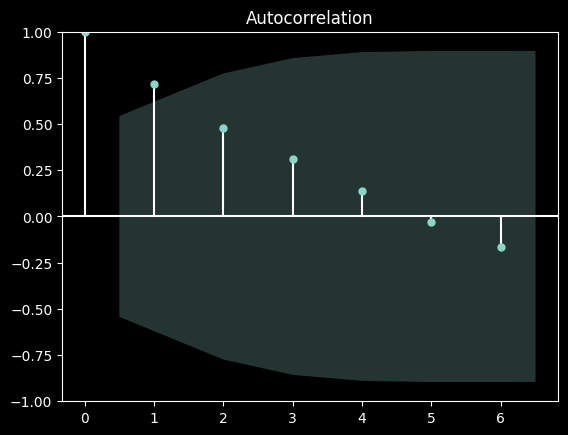

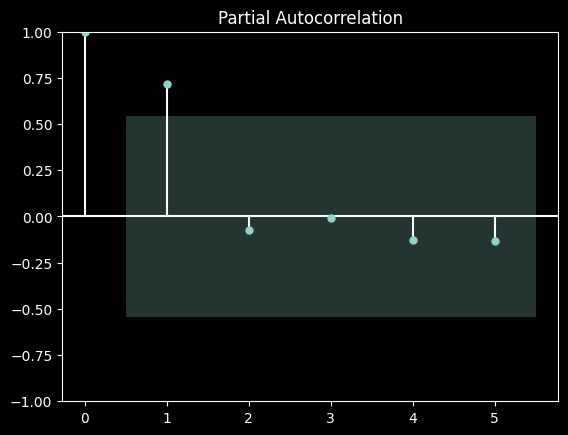

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



acf_original = plot_acf(vrp)

pacf_original = plot_pacf(vrp,lags=5)

Видим,что слева кореляция положительная,а справа отрицательная. Данный график помогает определить коэффициенты p и q для того,чтобы подогнать нашу модель.
Основные принципы выбора этих коэффициентов:
pacf - измеряет дисперсию баланса участка. Он говорит следует ли включать участок в модель авторегрессии **AR**
acf - измеряет корреляции с участками,помогает оценить скользящее среднее в моделях a.

*p - 2? потому что значительные всплески только первые два лага.
d - 1?*

Попробуем **ARIMA(2,1,0)**

Будем подгонять модель.

In [46]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_train,order=(2,1,0))
model_fit = model.fit()

print(model_fit.summary())

                                                   SARIMAX Results                                                   
Dep. Variable:     Валовой региональный продукт на душу населения, рублей 1)   No. Observations:                    6
Model:                                                        ARIMA(2, 1, 0)   Log Likelihood                 -56.374
Date:                                                       Fri, 21 Mar 2025   AIC                            118.748
Time:                                                               21:09:02   BIC                            117.576
Sample:                                                                    0   HQIC                           115.603
                                                                         - 6                                         
Covariance Type:                                                         opg                                         
                 coef    std err          z      P>|z|  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Наша модель. Теперь проверим насколько она качественная.

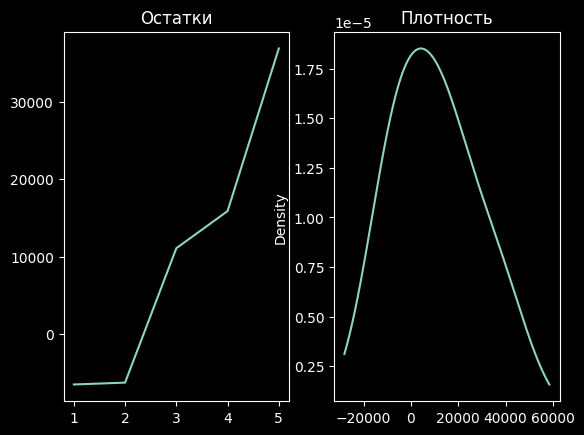

In [48]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

Плотность около нуля,поэтому все хорошо. Посмотрим на плотность и остатки наших acf и pacf.


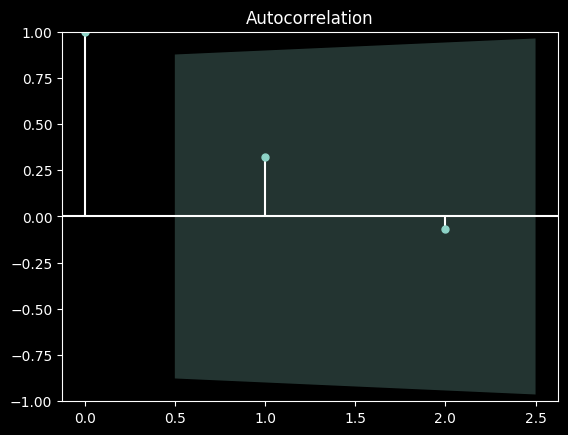

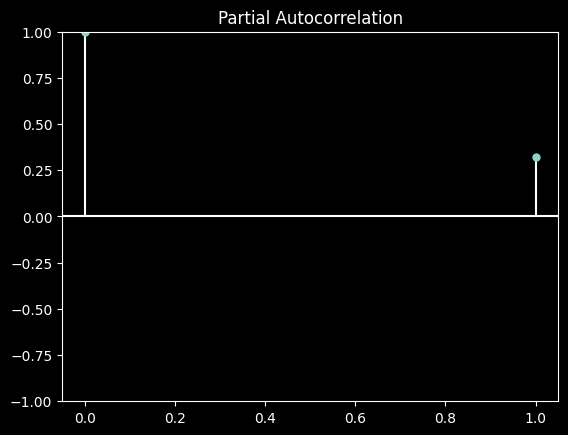

In [49]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals,lags=1)

Расчитаем прогнозы.

<ipython-input-68-4d40c78caf31>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



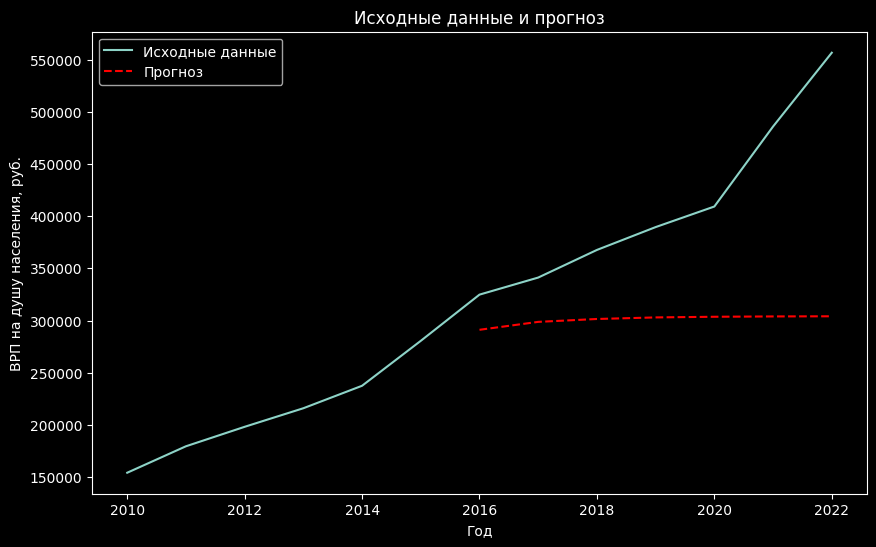

In [68]:
forecast_test = model_fit.forecast(len(data_test))

# Добавьте прогнозные значения в DataFrame
reg_product['forecast_manual'] = [None]*len(data_train) + list(forecast_test)

# Постройте график
plt.figure(figsize=(10,6))
plt.plot(year, vrp, label='Исходные данные')
plt.plot(year, reg_product['forecast_manual'], label='Прогноз', linestyle='--', color='red')
plt.xlabel('Год')
plt.ylabel('ВРП на душу населения, руб.')
plt.title('Исходные данные и прогноз')
plt.legend()
plt.show()


Предсказание не очень соответствует реальности.

In [3]:
#model = AutoARIMA(data_train, seasonal=True)
#forecast = model.predict(5)

#print(forecast)

In [4]:
#auto_arima = pm.auto_arima(data_train,stepwise=False,seasonal=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(1, 0, 2)   Log Likelihood                   1.957
Date:                Tue, 30 Apr 2024   AIC                              4.087
Time:                        03:13:21   BIC                              3.254
Sample:                             0   HQIC                             0.752
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.007    145.575      0.000       0.986       1.013
ma.L1          1.1433      2.600      0.440      0.660      -3.952       6.239
ma.L2          0.7550      3.584      0.211      0.833      -6.269       7.779
sigma2         0.0039      0.015      0.264      0.792      -0.025       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.33   Prob(JB):                         0.76
Heteroskedasticity (H):               0.71   Skew:                            -0.68
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

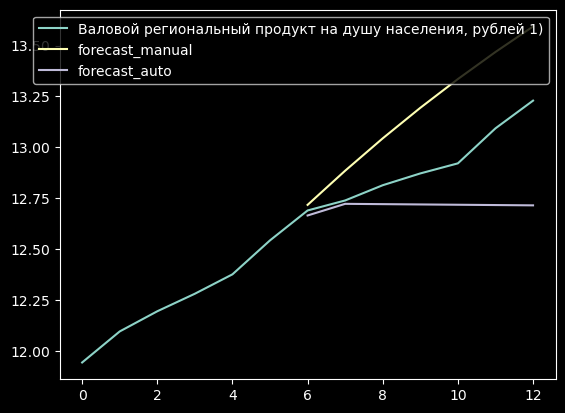

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(data_test))
data['forecast_auto'] = [None]*(len(data_train)) + list(forecast_test_auto)

data.plot()


1. Найти информацию по ковиду и по ввп. По кварталам
2. Оставить один плохой график
3. Построить плоский график по ценам доллара 2010 года с хорошим предсказанием (запасной план)
4. Попробовать интерполяцию.
5. Условия применимости ARCH,GARCH
6. Нормализовать данные


In [12]:
px.scatter(df,x='Год',y='Валовой региональный продукт на душу населения, рублей 1)',color='Год',size='Год',template='plotly_dark',title='<b> Рост ВВП с каждым годов в Ростовской области')

In [13]:
px.scatter(df,x='Год',y='Ожидаемая продолжительность жизни при рождении, лет 1)2)',color='Год',size='Год',template='plotly_dark',title='<b> Изменение продолжительности жизни с каждым годом')

Попробуем интерполяцию.

In [15]:
y = list(df['Ожидаемая продолжительность жизни при рождении, лет 1)2)'])
x = list(df['Год'])

In [18]:
import scipy. interpolate
y_interp = scipy. interpolate.interp1d (x, y)

for i in np.arange(2010,2022.5,0.5):
    middle_list = []
    if i < 2022:
        middle_list.append(y_interp(i))
    else:
        break


In [23]:
a = [i for i in np.arange(2010,2022.5,0.5)]
years = []
for i in a:
    if i < 2022.5:
        years.append(i)
    else:
        break


In [25]:
data = pd.DataFrame([years,middle_list],dtype=float)

In [26]:
data = data.T
data.columns = ['years', 'middle_list']

In [28]:
px.scatter(data,x='years',y='middle_list',color='years',template='plotly_dark',title='<b> Рост ВВП с каждым годов в Ростовской области')

<Axes: >

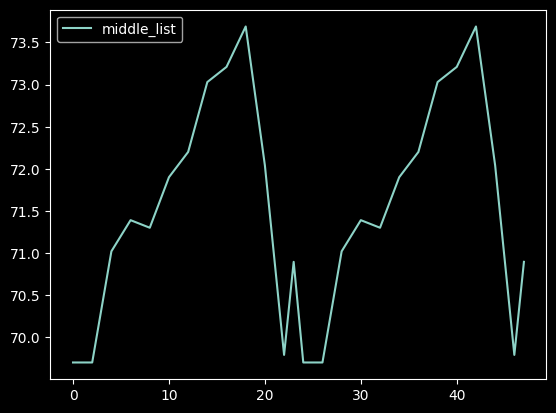

In [52]:
di = pd.DataFrame(data['middle_list'],dtype=float)
di.plot()

In [53]:
msk = (di.index < len(di)-17)
di_train = di[msk].copy()
di_test = di[~msk].copy()


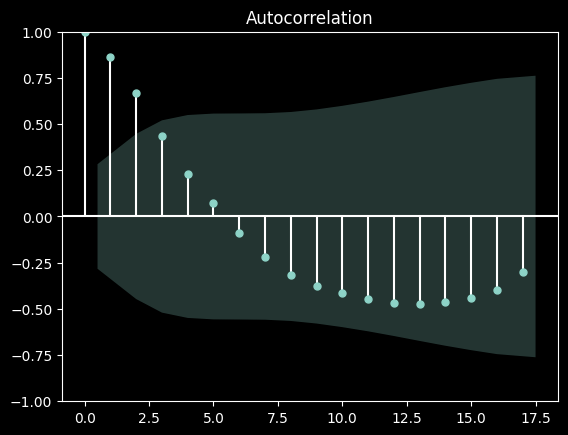

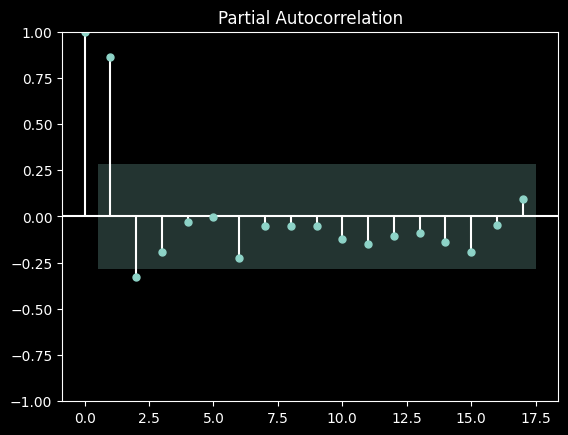

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



acf_original = plot_acf(di)

pacf_original = plot_pacf(di)

ARIMA(2,1,0)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(di_train,order=(18,1,1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            middle_list   No. Observations:                   31
Model:                ARIMA(18, 1, 1)   Log Likelihood                 -10.736
Date:                Fri, 21 Mar 2025   AIC                             61.473
Time:                        21:46:59   BIC                             89.497
Sample:                             0   HQIC                            70.438
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1656      0.574     -0.289      0.773      -1.290       0.959
ar.L2         -0.0842      0.452     -0.186      0.852      -0.970       0.801
ar.L3         -0.2301      0.439     -0.524      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



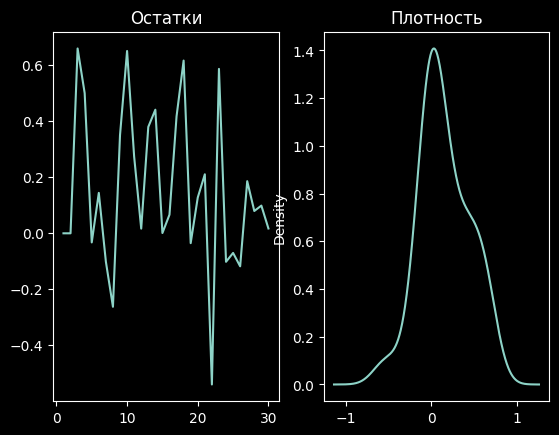

In [50]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

<Axes: >

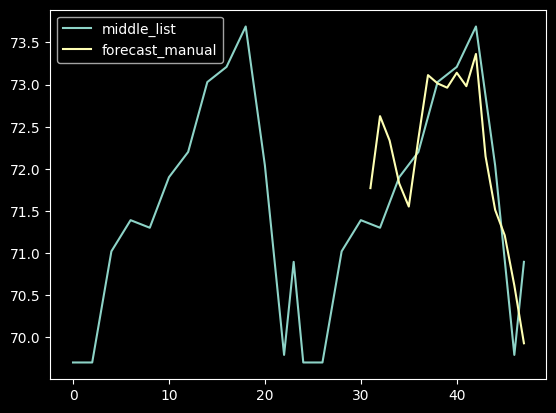

In [49]:
forecast_di = model_fit.forecast(len(di_test))

di['forecast_manual'] = [None]*(len(di_train)) + list(forecast_di)

di.plot()

In [38]:
dm = pd.DataFrame(list(di['middle_list']) + [None]*12,dtype=float)
dm.columns = ['middle_list']

ARIMA(16,1,1)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

mae = mean_absolute_error(di_test,forecast_di)
mape = mean_absolute_percentage_error(di_test,forecast_di)
mse = mean_squared_error(di_test,forecast_di)

print(f'mae {mae}\nmape {mape}\nmse {mse}')

mae 0.4755294633816526
mape 0.006631131555314793
mse 0.3444860501121739


Попробуем новую модель arch.

In [43]:
from arch import arch_model

In [44]:
from arch import arch_model

data['returns'] = 100*data['middle_list'].pct_change().dropna()

In [45]:
model_garch_1_1 = arch_model(data.returns[1:],mean = 'Constant',vol = 'GARCH',p = 1,q = 1)
result_garch_1_1 = model_garch_1_1.fit()
result_garch_1_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 496.4331643873205
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1487.347287641522
Iteration:      3,   Func. Count:     20,   Neg. LLF: 46.17851315900491
Iteration:      4,   Func. Count:     26,   Neg. LLF: 84.59689579864235
Iteration:      5,   Func. Count:     32,   Neg. LLF: 120.63618296009204
Iteration:      6,   Func. Count:     38,   Neg. LLF: 48.03871264178718
Iteration:      7,   Func. Count:     44,   Neg. LLF: 42.52768347459283
Iteration:      8,   Func. Count:     49,   Neg. LLF: 41.859680283979294
Iteration:      9,   Func. Count:     54,   Neg. LLF: 41.841572383438454
Iteration:     10,   Func. Count:     59,   Neg. LLF: 41.83976219723931
Iteration:     11,   Func. Count:     64,   Neg. LLF: 41.83932290040986
Iteration:     12,   Func. Count:     69,   Neg. LLF: 41.83921921843376
Iteration:     13,   Func. Count:     74,   Neg. LLF: 41.83920978528546
Iteration:     14,   Func. Count:     78,   Neg. LLF: 41.8392

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -41.8392
Distribution:                  Normal   AIC:                           91.6784
Method:            Maximum Likelihood   BIC:                           99.0790
                                        No. Observations:                   47
Date:                Fri, Mar 21 2025   Df Residuals:                       46
Time:                        21:49:47   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1744  8.318e-02      2.097  3.598e-02 [1.141e-02,  0.337]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1634  6.989e-02      2.338  1.940e-02 [2.640e-02,  0.300]
alpha[1]       0.7169      0.152      4.725  2.300e-06   [  0.420,  1.014]
beta[1]        0.0000  6.403e-02      0.000      1.000   [ -0.125,  0.125]
==========================================================================

Covariance estimator: robust
"""

Iteration:      1,   Func. Count:      6,   Neg. LLF: 496.4331643873205
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1487.347287641522
Iteration:      3,   Func. Count:     20,   Neg. LLF: 46.17851315900491
Iteration:      4,   Func. Count:     26,   Neg. LLF: 84.59689579864235
Iteration:      5,   Func. Count:     32,   Neg. LLF: 120.63618296009204
Iteration:      6,   Func. Count:     38,   Neg. LLF: 48.03871264178718
Iteration:      7,   Func. Count:     44,   Neg. LLF: 42.52768347459283
Iteration:      8,   Func. Count:     49,   Neg. LLF: 41.859680283979294
Iteration:      9,   Func. Count:     54,   Neg. LLF: 41.841572383438454
Iteration:     10,   Func. Count:     59,   Neg. LLF: 41.83976219723931
Iteration:     11,   Func. Count:     64,   Neg. LLF: 41.83932290040986
Iteration:     12,   Func. Count:     69,   Neg. LLF: 41.83921921843376
Iteration:     13,   Func. Count:     74,   Neg. LLF: 41.83920978528546
Iteration:     14,   Func. Count:     78,   Neg. LLF: 41.8392

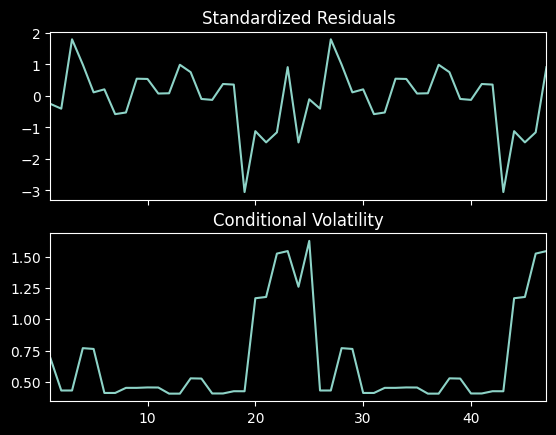

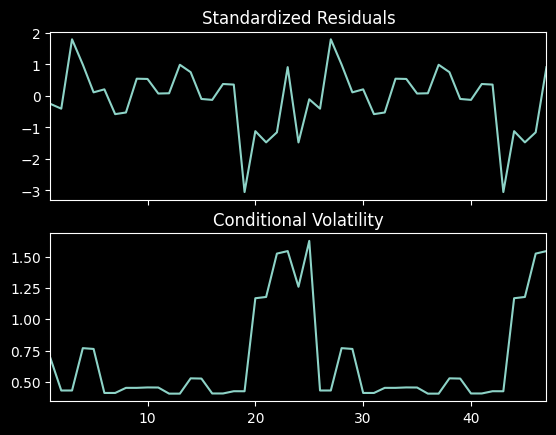

In [48]:
#forecast_gi = model_garch_1_1.fit.forecast(len(di_test))

model_garch_1_1.fit().plot()

In [ ]:
#di.pop('forecast_manual')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(di,order=(18,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            middle_list   No. Observations:                   48
Model:                ARIMA(18, 1, 1)   Log Likelihood                 -19.542
Date:                Tue, 30 Apr 2024   AIC                             79.084
Time:                        03:35:13   BIC                            116.087
Sample:                             0   HQIC                            93.008
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1538      0.499      0.308      0.758      -0.825       1.133
ar.L2         -0.0316      0.318     -0.099      0.921      -0.655       0.592
ar.L3         -0.1581      0.494     -0.320      0.7

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



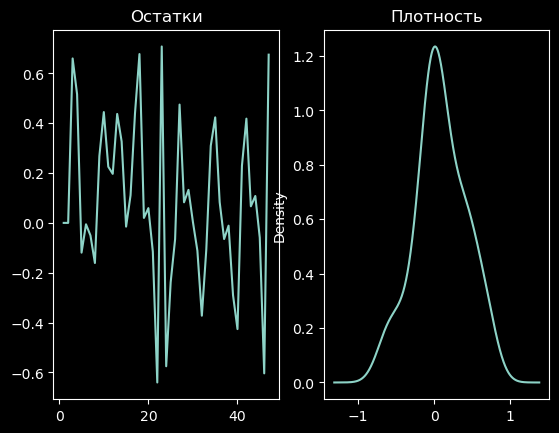

In [ ]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

In [56]:
forecast_dm = model_fit.forecast(12)
a = [70.895]
dm['middle_list'] = list(dm['middle_list'])
dm['forecast_manual'] = [None]*47 + a +  list(forecast_dm)

<Axes: >

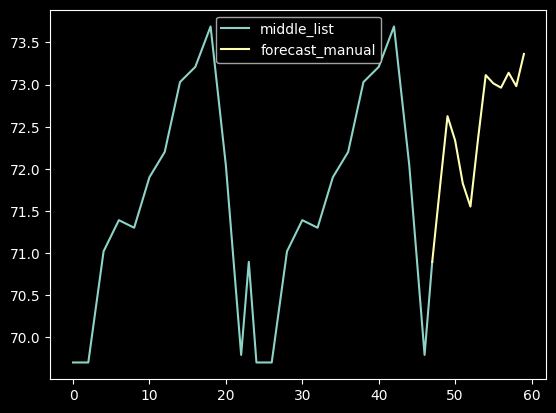

In [57]:
dm.plot()

In [67]:
data_to_plot.columns

Index(['Регион', 'Год', 'Доля проходящих мед осмотр',
       'Доля граждан занимающихся физкультурой',
       'Ожидаемая продолжительность здоровой жизни',
       'Ожидаемая продолжительность жизни при рождении',
       'Доля граждан, ведущих здоровый образ жизни',
       'Обеспеченность врачами на 10 000 человек населения, человек',
       'Обеспеченность врачами ',
       'Число медицинских работников на душу населения ',
       'ВИЧ-инфекции на 100 000 человек населения',
       'Заболеваемость туберкулезом на 100 000 человек',
       'Заболеваемость наркомания', 'Диабет ',
       'Доля расходов на здравоохранение',
       'Санитарное состояние атмосферного воздуха',
       'Доля затрат на медикаменты',
       'Санитарное состояние питьевого водоснабжения', 'Случаи гепатита B',
       'Случаи малярии', 'Случаи аскаридоза', 'Случаи эхинококкоза',
       'Случаи описторхоза', 'Психические расстройства',
       'Алкоголизм и алкольный психоз',
       'Смертность от новообразований, в т

In [81]:
fig=px.histogram(data_to_plot,x='Год',y='Доля граждан, ведущих здоровый образ жизни')
fig.show()

In [69]:
fig=px.line(data_to_plot.sort_values(by='Год'),x='Год',y='Доля граждан занимающихся физкультурой',animation_frame='Регион',animation_group='Год',color='Регион',markers=True,template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()

In [76]:
fig=px.line(data_to_plot.sort_values(by='Доля проходящих мед осмотр'),x='Доля проходящих мед осмотр',y='Доля граждан занимающихся физкультурой',animation_frame='Регион',animation_group='Доля проходящих мед осмотр',color='Регион',markers=True,template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()

In [80]:
#px.scatter(data_to_plot.sort_values(by='Год'),y='Доля граждан занимающихся физкультурой',x='Ожидаемая продолжительность здоровой жизни',animation_frame='Год',animation_group='Регион',template='plotly_dark',color='Регион',size='Ожидаемая продолжительность здоровой жизни',opacity=0.6,title='<b> Доля граждан занимающихся физкультурой')

In [79]:
fig=px.scatter(data_to_plot.sort_values(by='Доля расходов на здравоохранение'),x='Доля расходов на здравоохранение',y='Доля граждан, ведущих здоровый образ жизни',color='Регион',template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()